Import

In [11]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [12]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
import hashlib
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [27]:
# Import other libraries
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

Load dataset

In [ ]:
# Conditional check for unzipping
unzip = True

# Unzip the 'public_data.zip' file if the 'unzip' flag is True
if unzip:
    os.system("7z x public_data.zip")


In [22]:
# Carica il file NPZ
data = np.load('public_data.npz')

# Accedi all'array di immagini all'interno del file
images = data['data']  # Sostituisci 'data' con il nome corretto dell'array di immagini

# Directory in cui desideri salvare le immagini JPEG
output_directory = 'cartella_output/'

# Assicurati che la directory di output esista, altrimenti creala
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Salva le immagini come file JPEG
for i, image in enumerate(images):
    filename = f'{output_directory}immagine_{i}.jpg'
    cv2.imwrite(filename, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))



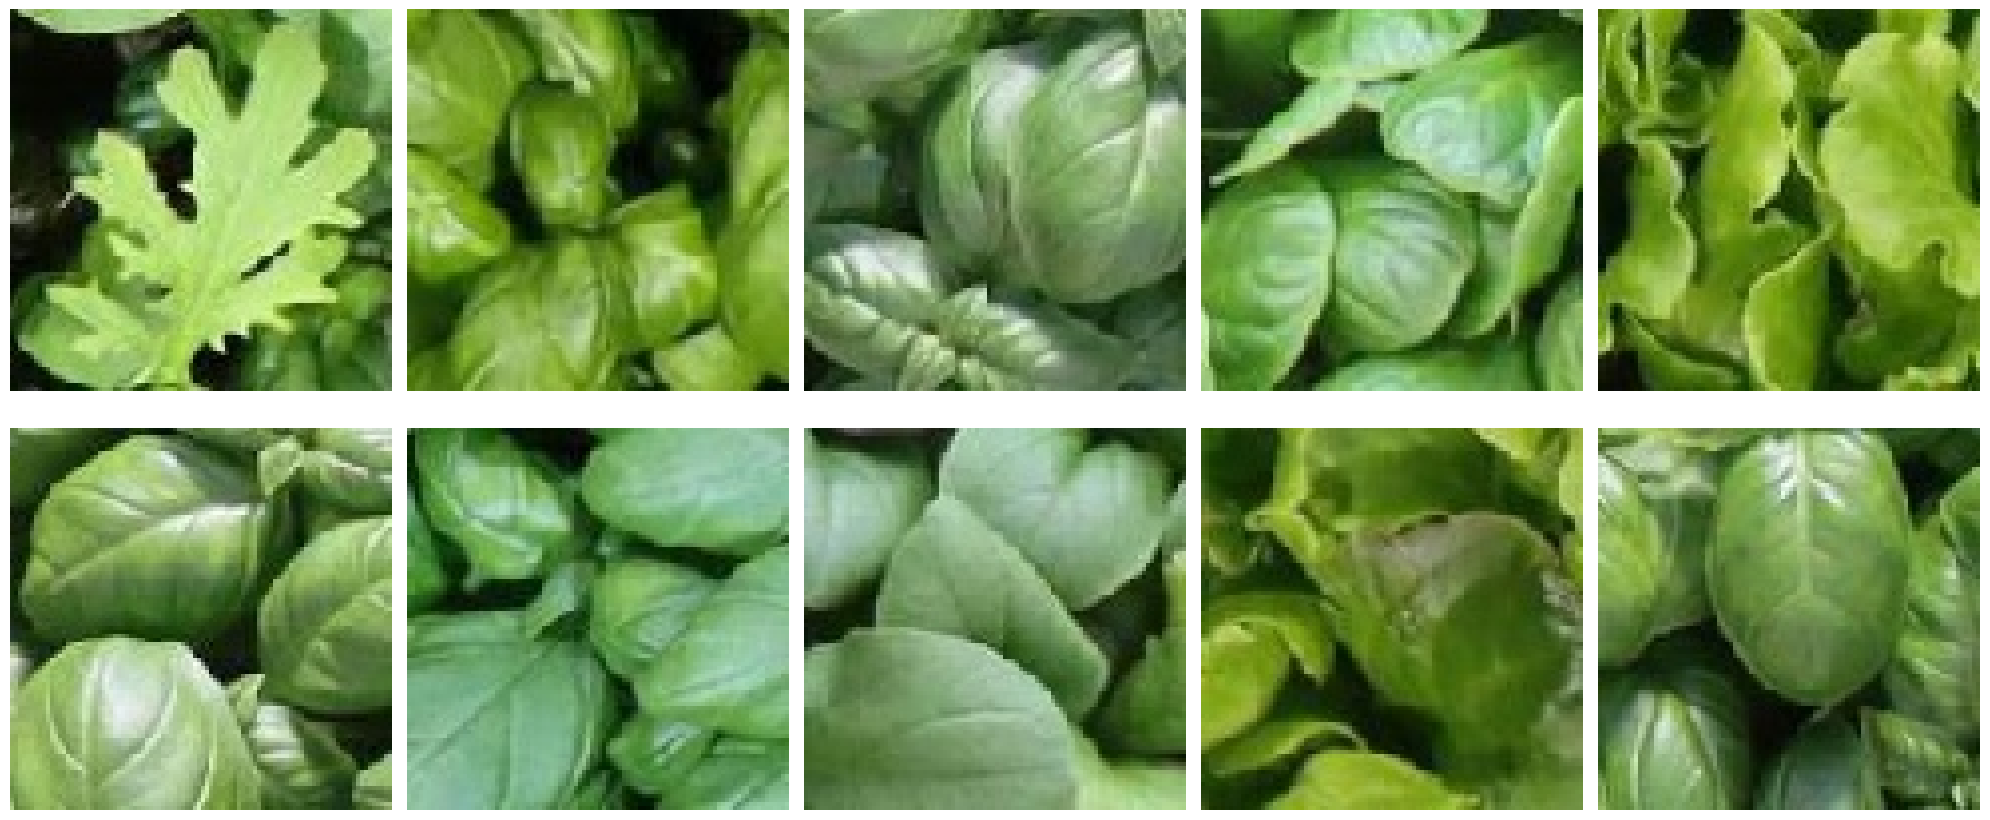

In [15]:
# Carica e visualizza le prime 'num_img' immagini dalla directory 'output_directory'
num_img = 10

# Crea subplots per visualizzare le immagini
fig, axes = plt.subplots(2, num_img // 2, figsize=(20, 9))
for i in range(num_img):
    ax = axes[i % 2, i % (num_img // 2)]
    image = cv2.imread(f'{output_directory}immagine_{i}.jpg')  # Carica l'immagine JPEG
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converti da BGR a RGB
    ax.imshow(np.clip(image, 0, 255))  # Visualizza l'immagine
    ax.axis('off')
plt.tight_layout()
plt.show()


In [23]:
from collections import defaultdict
import shutil
import imagehash
from PIL import Image

# Carica il file NPZ
data = np.load('public_data.npz')

# Accedi all'array di immagini all'interno del file
images = data['data']  # Sostituisci 'data' con il nome corretto dell'array di immagini

# Calcola gli hash delle immagini
image_hashes = {}
for i, image in enumerate(images):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    hash_value = imagehash.average_hash(Image.fromarray(gray_image))
    image_hashes[i] = hash_value

# Crea un dizionario per tenere traccia delle occorrenze degli hash
hash_occurrences = defaultdict(int)

# Trova le immagini duplicate e conta le occorrenze
for hash_value in image_hashes.values():
    hash_occurrences[hash_value] += 1

# Directory per il dataset pulito
cleaned_dataset_directory = 'cleaned_dataset/'

# Assicurati che la directory pulita esista, altrimenti creala
if not os.path.exists(cleaned_dataset_directory):
    os.makedirs(cleaned_dataset_directory)

# Crea una lista di immagini uniche
unique_images = []

# Elimina le immagini duplicate dalla cartella di output e sposta le immagini uniche nel dataset pulito
for i, image in enumerate(images):
    if hash_occurrences[image_hashes[i]] == 1:
        # Sposta le immagini con occorrenza uguale a 1 nel dataset pulito
        filename = f'{output_directory}immagine_{i}.jpg'
        shutil.move(filename, f'{cleaned_dataset_directory}immagine_{i}.jpg')
    else:
        unique_images.append(image)


In [58]:
from sklearn.preprocessing import LabelBinarizer

# Load the dataset
data = np.load('public_data.npz')
images = data['data']

# Assign labels to images (example random assignment)
# Replace this with your actual labeling process

# Continue with model training
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_val = label_binarizer.transform(y_val)


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(2, activation='softmax'))  # 2 output classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 47, 47, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 10, 10, 128)      

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Creare un modello sequenziale
model = Sequential()

# Aggiungere il primo strato convoluzionale
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(MaxPooling2D((2, 2)))

# Aggiungere il secondo strato convoluzionale
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Aggiungere il terzo strato convoluzionale
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Appiattire l'output
model.add(Flatten())

# Aggiungere uno o più strati densi
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout per la regolarizzazione
model.add(Dense(2, activation='softmax'))  # 2 classi di output

# Compilare il modello
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Preprocessare le immagini utilizzando ImageDataGenerator
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,  # Normalizza i pixel nell'intervallo [0, 1]
    rotation_range=20,  # Rotazioni casuali delle immagini
    width_shift_range=0.2,  # Spostamenti casuali in larghezza
    height_shift_range=0.2,  # Spostamenti casuali in altezza
    shear_range=0.2,  # Deformazioni casuali
    zoom_range=0.2,  # Ingrandimenti casuali
    horizontal_flip=True,  # Ribaltamento orizzontale casuale
    fill_mode='nearest'  # Modalità di riempimento
)

# Assicurarsi che le etichette siano codificate in formato one-hot
y_train_one_hot = to_categorical(y_train, num_classes=2)  # Dove 2 è il numero di classi
y_val_one_hot = to_categorical(y_val, num_classes=2)

# Addestrare il modello utilizzando ImageDataGenerator
model.fit(
    train_datagen.flow(x_train, y_train_one_hot, batch_size=32),
    epochs=10,
    validation_data=(x_val, y_val_one_hot)
)


Epoch 1/10
130/130 [==============================] - 30s 219ms/step - loss: 0.6953 - accuracy: 0.4976 - val_loss: 1.9212 - val_accuracy: 0.5163
Epoch 2/10
130/130 [==============================] - 28s 215ms/step - loss: 0.6933 - accuracy: 0.4885 - val_loss: 0.7946 - val_accuracy: 0.5115
Epoch 3/10
130/130 [==============================] - 28s 216ms/step - loss: 0.6933 - accuracy: 0.4887 - val_loss: 0.7755 - val_accuracy: 0.4962
Epoch 4/10
130/130 [==============================] - 30s 231ms/step - loss: 0.6931 - accuracy: 0.5010 - val_loss: 0.7761 - val_accuracy: 0.4971
Epoch 5/10
130/130 [==============================] - 29s 220ms/step - loss: 0.6933 - accuracy: 0.5014 - val_loss: 0.8123 - val_accuracy: 0.5144
Epoch 6/10
130/130 [==============================] - 28s 212ms/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.8103 - val_accuracy: 0.5221
Epoch 7/10
130/130 [==============================] - 29s 222ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 1.2606 - val_ac

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Add the 'early_stopping' callback to the model.fit() function
model.fit(
    train_datagen.flow(x_train, y_train_one_hot, batch_size=32),
    epochs=100,  # Train for a larger number of epochs
    validation_data=(x_val, y_val_one_hot),
    callbacks=[early_stopping]  # Include the early stopping callback
)


Epoch 1/100
130/130 [==============================] - 28s 212ms/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 1.3803 - val_accuracy: 0.4904
Epoch 2/100
130/130 [==============================] - 28s 215ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 1.3804 - val_accuracy: 0.4913
Epoch 3/100
130/130 [==============================] - 28s 217ms/step - loss: 0.6932 - accuracy: 0.5053 - val_loss: 1.3343 - val_accuracy: 0.4913
Epoch 4/100
130/130 [==============================] - 26s 197ms/step - loss: 0.6933 - accuracy: 0.5002 - val_loss: 1.3062 - val_accuracy: 0.4923
Epoch 5/100
130/130 [==============================] - 27s 208ms/step - loss: 0.6931 - accuracy: 0.4988 - val_loss: 1.2681 - val_accuracy: 0.4933
Epoch 6/100
130/130 [==============================] - 26s 201ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 1.2086 - val_accuracy: 0.4942
Epoch 7/100
130/130 [==============================] - 29s 225ms/step - loss: 0.6931 - accuracy: 0.5026 - val_loss: 1.1346 -

KeyboardInterrupt: 

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output for fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(2, activation='softmax'))  # 2 output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can proceed with data preprocessing and training
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,  # Normalizza i pixel nell'intervallo [0, 1]
    rotation_range=20,  # Rotazioni casuali delle immagini
    width_shift_range=0.2,  # Spostamenti casuali in larghezza
    height_shift_range=0.2,  # Spostamenti casuali in altezza
    shear_range=0.2,  # Deformazioni casuali
    zoom_range=0.2,  # Ingrandimenti casuali
    horizontal_flip=True,  # Ribaltamento orizzontale casuale
    fill_mode='nearest'  # Modalità di riempimento
)

# Assicurarsi che le etichette siano codificate in formato one-hot
y_train_one_hot = to_categorical(y_train, num_classes=2)  # Dove 2 è il numero di classi
y_val_one_hot = to_categorical(y_val, num_classes=2)

# Addestrare il modello utilizzando ImageDataGenerator
model.fit(
    train_datagen.flow(x_train, y_train_one_hot, batch_size=32),
    epochs=10,
    validation_data=(x_val, y_val_one_hot)
)

Epoch 1/10
130/130 [==============================] - 29s 217ms/step - loss: 0.6969 - accuracy: 0.5012 - val_loss: 2.6644 - val_accuracy: 0.5144
Epoch 2/10
130/130 [==============================] - 28s 215ms/step - loss: 0.6935 - accuracy: 0.4966 - val_loss: 1.4855 - val_accuracy: 0.4846
Epoch 3/10
130/130 [==============================] - 30s 229ms/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 1.3914 - val_accuracy: 0.4846
Epoch 4/10
130/130 [==============================] - 30s 232ms/step - loss: 0.6932 - accuracy: 0.5031 - val_loss: 1.5013 - val_accuracy: 0.4846
Epoch 5/10
130/130 [==============================] - 28s 217ms/step - loss: 0.6933 - accuracy: 0.4892 - val_loss: 1.5090 - val_accuracy: 0.4846
Epoch 6/10
130/130 [==============================] - 32s 246ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 1.4434 - val_accuracy: 0.4846
Epoch 7/10
130/130 [==============================] - 34s 260ms/step - loss: 0.6932 - accuracy: 0.5024 - val_loss: 1.4920 - val_ac